In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

We know from the empiric Beer-Lambert law that:
$$I = I_0 e^{-\mu d}$$
Nevertheless, this distance $d$ refers to the radial distance traveled by the beam of light from the source until it exits the material. So using a rectangular coordiante system, $d$ is given by:

$$d = |\vec(r)| = \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}$$

So the Beer-Lambert law can be rewritten as:
$$I = I_0 e^{-\mu \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}}$$


### I am here.
Now, the LEDs we are interested in are not a point source, but actually angle dependent. The brightest point being directly underneath the LED and no light reaching angles 

$$I(r) = \frac{(z-z_0)}{d} \exp^{-\mu d}$$

In [2]:
def one_light_one_point(mu, x, y, z, x0, y0, z0=0):
    d = np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)
#     return np.exp(-mu*z)
    return np.exp(-mu*d)
#     return (z-z0)/d * np.exp(-mu*d) # The angle dependence of an LED is included in the first term here!
# The issue might be the length defined here. Why are you subtracting z0.
# I do not think so, z0 has always been set to 0


def vectorized_one_light(mu, xx, yy, z, x0, y0, z0=0): # Be careful you might have transposed space.
    # xx and yy are variables, but the depth is fixed
    
    if np.shape(xx) != np.shape(yy):
        print("Different length arrays.")
    
    iteration_length_1, iteration_length_2 = np.shape(xx)
    matrix = np.array([np.zeros(iteration_length_1) for row in range(iteration_length_2)])
        
    for i in range(iteration_length_1):
        for j in range(iteration_length_2):
            matrix[i][j] = one_light_one_point(mu, xx[i][j], yy[i][j], z, x0, y0, z0)
            
    return matrix


def three_D_one_light(mu, xx, yy, zz, x0, y0, z0=0):
    #Create a function. For each infinitesimal volumetric input, there is an expected light intensity output.
    # xx, yy and zz are 3D-arrays, where each volumetric point is defined by a single index.
    
    if np.shape(xx) != np.shape(yy):
        print("Different length arrays.")
    elif np.shape(xx) != np.shape(zz):
        print("Different length arrays.")
    
    it_length_1, it_length_2, it_length_3 = np.shape(xx)
    matrix = np.array([[np.zeros(it_length_1) for row in range(it_length_2)] for width in range(it_length_3)])
    
    for i in range(it_length_1):
        for j in range(it_length_2):
            for k in range(it_length_3):
                
                matrix[i][j][k] = one_light_one_point(mu, xx[i][j][k], yy[i][j][k], zz[i][j][k], x0, y0, z0)
            
    return matrix

In [3]:
mu = 1
x0, y0, z0 = 0, 2, 0
pixels_n = 101

x_ = np.linspace(-5, 5, pixels_n)
y_ = np.linspace(-5, 5, pixels_n)
z_ = np.linspace(0, 5, pixels_n)

xx, yy, zz = np.meshgrid(x_, y_, z_, indexing='ij')
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)


# one_light_one_point(mu, x, y, z, x0, y0)
# matrix = vectorized_one_light(mu, xx, yy, z, x0, y0)
matrix = three_D_one_light(mu, xx, yy, zz, x0, y0, z0)                         

In [4]:
matrix.shape

(101, 101, 101)

# Given a number in the reals, find the 3 projections defined by that plane when fixing one of the three variables in that number and varying the other 2.

In [5]:
def indices_to_be_found(number, x_, y_, z_):
    '''
        The number should be in all the domains: x_, y_ and z_
    '''
    difference_array_x = np.absolute(x_-number)
    difference_array_y = np.absolute(y_-number)
    difference_array_z = np.absolute(z_-number)
    
    index_x = difference_array_x.argmin()
    index_y = difference_array_y.argmin()
    index_z = difference_array_z.argmin()
    
    return index_x, index_y, index_z

In the next cell, change the value of `number` to a value between [0,5] to visualize different volumetric projections in 2D planes.

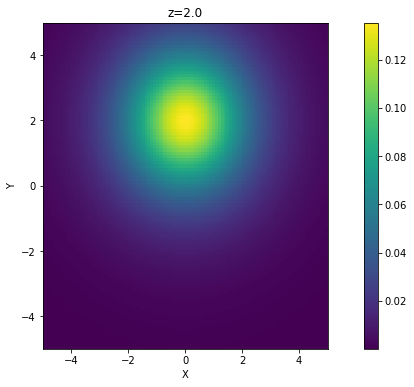

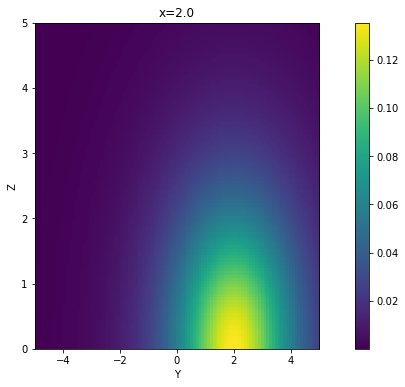

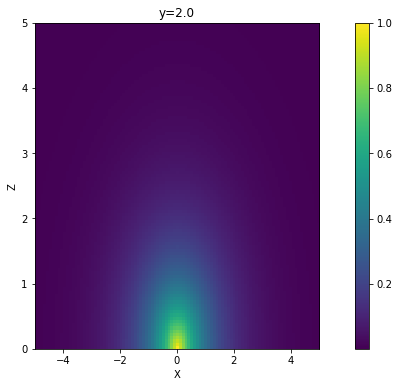

In [6]:
# Visualizing different volumetric projections
number = 2
index_x, index_y, index_z = indices_to_be_found(number, x_, y_, z_)

# Projection in the X-Y plane, expected figure is the circle with exponentially decaying intensities.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,:,index_z].T, origin="lower", interpolation='none', extent=[-5,5, -5, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("z="+str(z_[index_z]))
# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the Y-Z plane, expected figure is the traingle one with decaying intensities along the medium.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[index_x,:,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("x="+str(x_[index_x]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the X-Z plane, expected figure is the traingle one with exponentially decaying intensities
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,index_y,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("y="+str(y_[index_y]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

In the previous graphs, please note the scale bar!

# Why is the light source not centered in zero? There should be a mistake somewhere. The visualizations are not what I would expect them to be, even when using a simple decaying exponential which only depends on the variable `z`. Why?

You were retrieving the information from this matrices in a way where you did not obtain the info you wanted. See this for reference: https://www.geeksforgeeks.org/how-to-retrieve-an-entire-row-or-column-of-an-array-in-python/

Note you had to transpose the matrix in order to visualize it in the way you expected. Why?